In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
# load dataset into Pandas DataFrame
df = pd.read_csv("../data/DoE_Data.csv", skiprows=[0,1,2,3,4,5,6,7,8,9,10,15], names=['Experiment ID','Growth Time','Total Gas Flow Rate','Dew Point','Graphene Presence', 'Graphene Grade'])
df = df.dropna()

In [18]:
features = ['Growth Time','Total Gas Flow Rate','Dew Point']
# Separating out the features
x = df.loc[:, features].values
print(x.shape)
# Separating out the target
y = df.loc[:,['Graphene Presence']].values
print(y.shape)
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x.shape)

(36, 3)
(36, 1)
(36, 3)


In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [25]:
principalDf

,principal component 1,principal component 2
0,-1.619960,0.059530
1,-1.634649,0.079804
2,0.567732,-0.372980
3,2.896290,4.747453
4,-1.354389,1.359844
5,-1.104405,1.273512
6,-1.565526,0.243090
7,-1.515950,0.174667
8,-1.066113,0.961975
9,-0.697046,0.452602


In [20]:
finalDf = pd.concat([principalDf, df[['Graphene Presence']]], axis = 1)

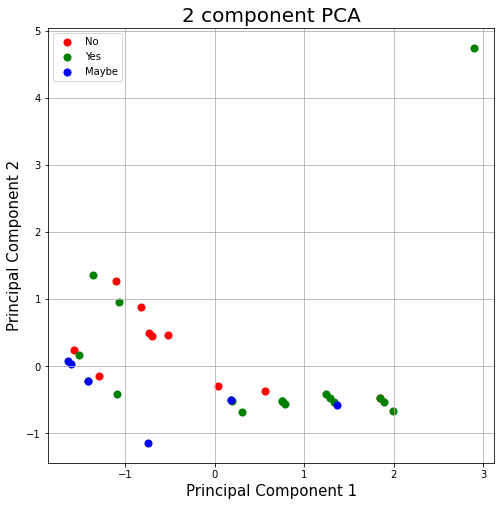

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['No', 'Yes', 'Maybe']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Graphene Presence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
print('Principal Components:', pca.components_)
print('')
print('Explained Variance:', pca.explained_variance_)
print('')
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
print('')
print('Singular Values:', pca.singular_values_)

Principal Components: [[ 5.03814018e-01  6.97730775e-01  5.09257500e-01]
 [ 7.11328092e-01 -6.31220330e-04 -7.02859835e-01]]

Explained Variance: [1.67403573 0.99543715]

Explained Variance Ratio: [0.54251158 0.32259537]

Singular Values: [7.65449218 5.90256725]
